# 데이터 전처리

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def labelencoder(df): 
    encoders = {}
    i = 0
    for c in df.columns:
        encoders[i] = None
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
            encoders[i] = lbl
        i += 1
    return df, encoders

df = pd.read_csv('./seoul_house_price.csv')

# df, encoder = labelencoder(df)

df = df[ df['Type'] == 'APT' ]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12128 entries, 1 to 17756
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                12128 non-null  object 
 1   Type                12128 non-null  object 
 2   Build               12128 non-null  int64  
 3   Dir                 12128 non-null  object 
 4   minArea             12128 non-null  float64
 5   maxArea             12128 non-null  float64
 6   representativeArea  12128 non-null  float64
 7   floorAreaRatio      12128 non-null  int64  
 8   minDeal             11659 non-null  float64
 9   maxDeal             11659 non-null  float64
 10  medianDeal          11659 non-null  float64
 11  minLease            8418 non-null   float64
 12  maxLease            8418 non-null   float64
 13  medianLease         6658 non-null   float64
 14  minDealUnit         11659 non-null  float64
 15  maxDealUnit         11659 non-null  float64
 16  medi

## Feature

In [116]:
features = ['Type', 'Dir' ,'Old', 'sector', 'divisition', 'representativeArea', 'floorAreaRatio', 'BUS', 'METRO', 'INFANT', 'PRESCHOOL', 'HOSPITAL', 'PARKING', 'MART', 'CONVENIENCE', 'BANK', 'OFFICE', 'PRI_SCHOOL', 'PUB_SCHOOL']
label = 'price'

pre_df = df[features].copy()

pre_df[label] = (df['minDeal'] + df['maxDeal']) / 2

pre_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12128 entries, 1 to 17756
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                12128 non-null  object 
 1   Dir                 12128 non-null  object 
 2   Old                 12128 non-null  object 
 3   sector              12128 non-null  object 
 4   divisition          12128 non-null  object 
 5   representativeArea  12128 non-null  float64
 6   floorAreaRatio      12128 non-null  int64  
 7   BUS                 12128 non-null  int64  
 8   METRO               12128 non-null  int64  
 9   INFANT              12128 non-null  int64  
 10  PRESCHOOL           12128 non-null  int64  
 11  HOSPITAL            12128 non-null  int64  
 12  PARKING             12128 non-null  int64  
 13  MART                12128 non-null  int64  
 14  CONVENIENCE         12128 non-null  int64  
 15  BANK                12128 non-null  int64  
 16  OFFI

In [117]:
#floorAreaRatio - 0 : missing value

drops = ['representativeArea', 'floorAreaRatio', label]

for dr in drops:
    pre_df.loc[:,dr] = pre_df[dr].copy().apply(lambda x : None if x == 0 else x)
pre_df.dropna(inplace=True)
pre_df.reset_index(drop=True, inplace=True)
pre_df

,Type,Dir,Old,sector,divisition,representativeArea,floorAreaRatio,BUS,METRO,INFANT,PRESCHOOL,HOSPITAL,PARKING,MART,CONVENIENCE,BANK,OFFICE,PRI_SCHOOL,PUB_SCHOOL,price
0,APT,EE,Old,가락동,송파구,182.0,545.0,0,0,0,0,0,3,0,1,0,0,0,0,159000.0
1,APT,EE,New,가락동,송파구,110.0,285.0,0,0,0,0,0,0,0,0,0,0,0,0,306750.0
2,APT,EE,Old,가락동,송파구,141.0,299.0,0,0,0,0,0,0,0,0,0,0,0,0,227500.0
3,APT,EE,Old,가락동,송파구,81.0,343.0,0,0,4,0,0,0,0,1,1,0,0,0,167500.0
4,APT,EE,Old,가락동,송파구,35.0,673.0,0,0,0,0,0,3,0,3,0,0,0,0,21750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10866,APT,SS,Old,흥인동,중구,118.0,837.0,0,0,0,0,0,3,0,3,1,0,0,0,82500.0
10867,APT,SS,Common,흥인동,중구,163.0,696.0,0,0,1,0,0,4,0,2,1,0,0,0,202500.0
10868,APT,EN,Common,흥인동,중구,163.0,696.0,0,0,1,0,0,4,0,2,1,0,0,0,202500.0
10869,APT,NN,Common,흥인동,중구,29.0,799.0,1,0,0,1,0,2,0,3,1,0,0,0,25500.0


In [118]:
#True false
def to_binominal(x):
    return x > 0

binomial_header = ['BUS', 'METRO', 'INFANT', 'PRESCHOOL', 'HOSPITAL', 'PARKING', 'MART', 'CONVENIENCE', 'BANK', 'OFFICE', 'PRI_SCHOOL', 'PUB_SCHOOL']

for head in binomial_header:
    pre_df.loc[:,head] = pre_df[head].copy().apply(to_binominal)

pre_df


,Type,Dir,Old,sector,divisition,representativeArea,floorAreaRatio,BUS,METRO,INFANT,PRESCHOOL,HOSPITAL,PARKING,MART,CONVENIENCE,BANK,OFFICE,PRI_SCHOOL,PUB_SCHOOL,price
0,APT,EE,Old,가락동,송파구,182.0,545.0,False,False,False,False,False,True,False,True,False,False,False,False,159000.0
1,APT,EE,New,가락동,송파구,110.0,285.0,False,False,False,False,False,False,False,False,False,False,False,False,306750.0
2,APT,EE,Old,가락동,송파구,141.0,299.0,False,False,False,False,False,False,False,False,False,False,False,False,227500.0
3,APT,EE,Old,가락동,송파구,81.0,343.0,False,False,True,False,False,False,False,True,True,False,False,False,167500.0
4,APT,EE,Old,가락동,송파구,35.0,673.0,False,False,False,False,False,True,False,True,False,False,False,False,21750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10866,APT,SS,Old,흥인동,중구,118.0,837.0,False,False,False,False,False,True,False,True,True,False,False,False,82500.0
10867,APT,SS,Common,흥인동,중구,163.0,696.0,False,False,True,False,False,True,False,True,True,False,False,False,202500.0
10868,APT,EN,Common,흥인동,중구,163.0,696.0,False,False,True,False,False,True,False,True,True,False,False,False,202500.0
10869,APT,NN,Common,흥인동,중구,29.0,799.0,True,False,False,True,False,True,False,True,True,False,False,False,25500.0


## Outlier

In [122]:
def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 3  # 제거 범위 조절 변수
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff


pre_df = remove_out(pre_df, [label])

pre_df.describe()

,representativeArea,floorAreaRatio,price
count,10606.000000,10606.000000,10606.000000
mean,96.019234,327.857251,120804.520460
std,36.994305,168.706480,73617.243973
min,15.000000,12.000000,6500.000000
25%,79.000000,235.000000,71000.000000
50%,102.000000,273.000000,105000.000000
75%,110.000000,356.750000,154500.000000
max,336.000000,1249.000000,407000.000000


## Scale

In [120]:
sns.set(rc={'figure.figsize':(30,30)})
# res = sns.heatmap(pre_df.corr().round(2), square=True, cmap='RdYlGn', annot=True, annot_kws={"size": 20})

# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)

dir_df = pre_df.groupby(by='Dir')

dir_df.describe()

representativeArea                                                   \
                 count        mean        std   min   25%    50%    75%   
Dir                                                                       
EE              1751.0   94.731582  34.541535  16.0  79.0  102.0  109.0   
EN               418.0   83.894737  44.768559  18.0  44.0   85.0  109.0   
ES              2150.0   97.709767  33.571361  16.0  81.0  103.0  110.0   
NN               294.0   76.561224  46.610520  15.0  34.0   75.5  106.0   
SS              3061.0  100.173473  37.959072  16.0  81.0  103.0  111.0   
WN               349.0   91.303725  46.123454  16.0  58.0   98.0  110.0   
WS              1784.0   98.036435  34.171491  16.0  81.0  104.0  110.0   
WW               821.0   90.814860  37.204803  16.0  73.0  100.0  109.0   

           floorAreaRatio              ...                   price  \
       max          count        mean  ...     75%     max   count   
Dir                                    ...                           
EE   261.0         1751.0  326.612222  ...  355.00  1106.0  1751.0   
EN   263.0          418.0  410.590909  ...  535.50  1249.0   418.0   
ES   262.0         2150.0  310.634419  ...  334.00  1084.0  2150.0   
NN   290.0          294.0  431.306122  ...  566.50  1102.0   294.0   
SS   336.0         3061.0  308.748775  ...  333.00  1102.0  3061.0   
WN   290.0          349.0  404.610315  ...  513.00  1249.0   349.0   
WS   336.0         1784.0  314.840247  ...  341.25  1249.0  1784.0   
WW   261.0          821.0  361.989038  ...  397.00  1249.0   821.0   

                                                                        \
              mean           std      min      25%       50%       75%   
Dir                                                                      
EE   116875.422616  70681.671811   8700.0  71000.0  101000.0  149250.0   
EN   108939.449761  82860.191839   6500.0  43062.5   91875.0  151500.0   
ES   125064.039535  71794.140602   8700.0  77500.0  111500.0  156500.0   
NN   100656.343537  89139.394058   9350.0  33000.0   70650.0  141875.0   
SS   124410.675923  75433.944182   8700.0  74000.0  105000.0  157500.0   
WN   121464.169054  85850.837468  10250.0  52500.0  107000.0  166500.0   
WS   126083.181054  71313.285715   8700.0  78500.0  113500.0  157500.0   
WW   113965.371498  77667.811067   8000.0  63000.0   95000.0  146500.0   

               
          max  
Dir            
EE   420000.0  
EN   415000.0  
ES   420000.0  
NN   415000.0  
SS   420000.0  
WN   415000.0  
WS   420000.0  
WW   415000.0  

[8 rows x 24 columns]

/var/folders/y8/ldvzwhm13037mvvt3p2d9n0m0000gn/T/ipykernel_43271/502772003.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


[Text(0, 85000.0, '8.50억'),
 Text(0, 90000.0, '9.00억'),
 Text(0, 95000.0, '9.50억'),
 Text(0, 100000.0, '10.00억'),
 Text(0, 105000.0, '10.50억'),
 Text(0, 110000.0, '11.00억'),
 Text(0, 115000.0, '11.50억'),
 Text(0, 120000.0, '12.00억'),
 Text(0, 125000.0, '12.50억'),
 Text(0, 130000.0, '13.00억'),
 Text(0, 135000.0, '13.50억')]

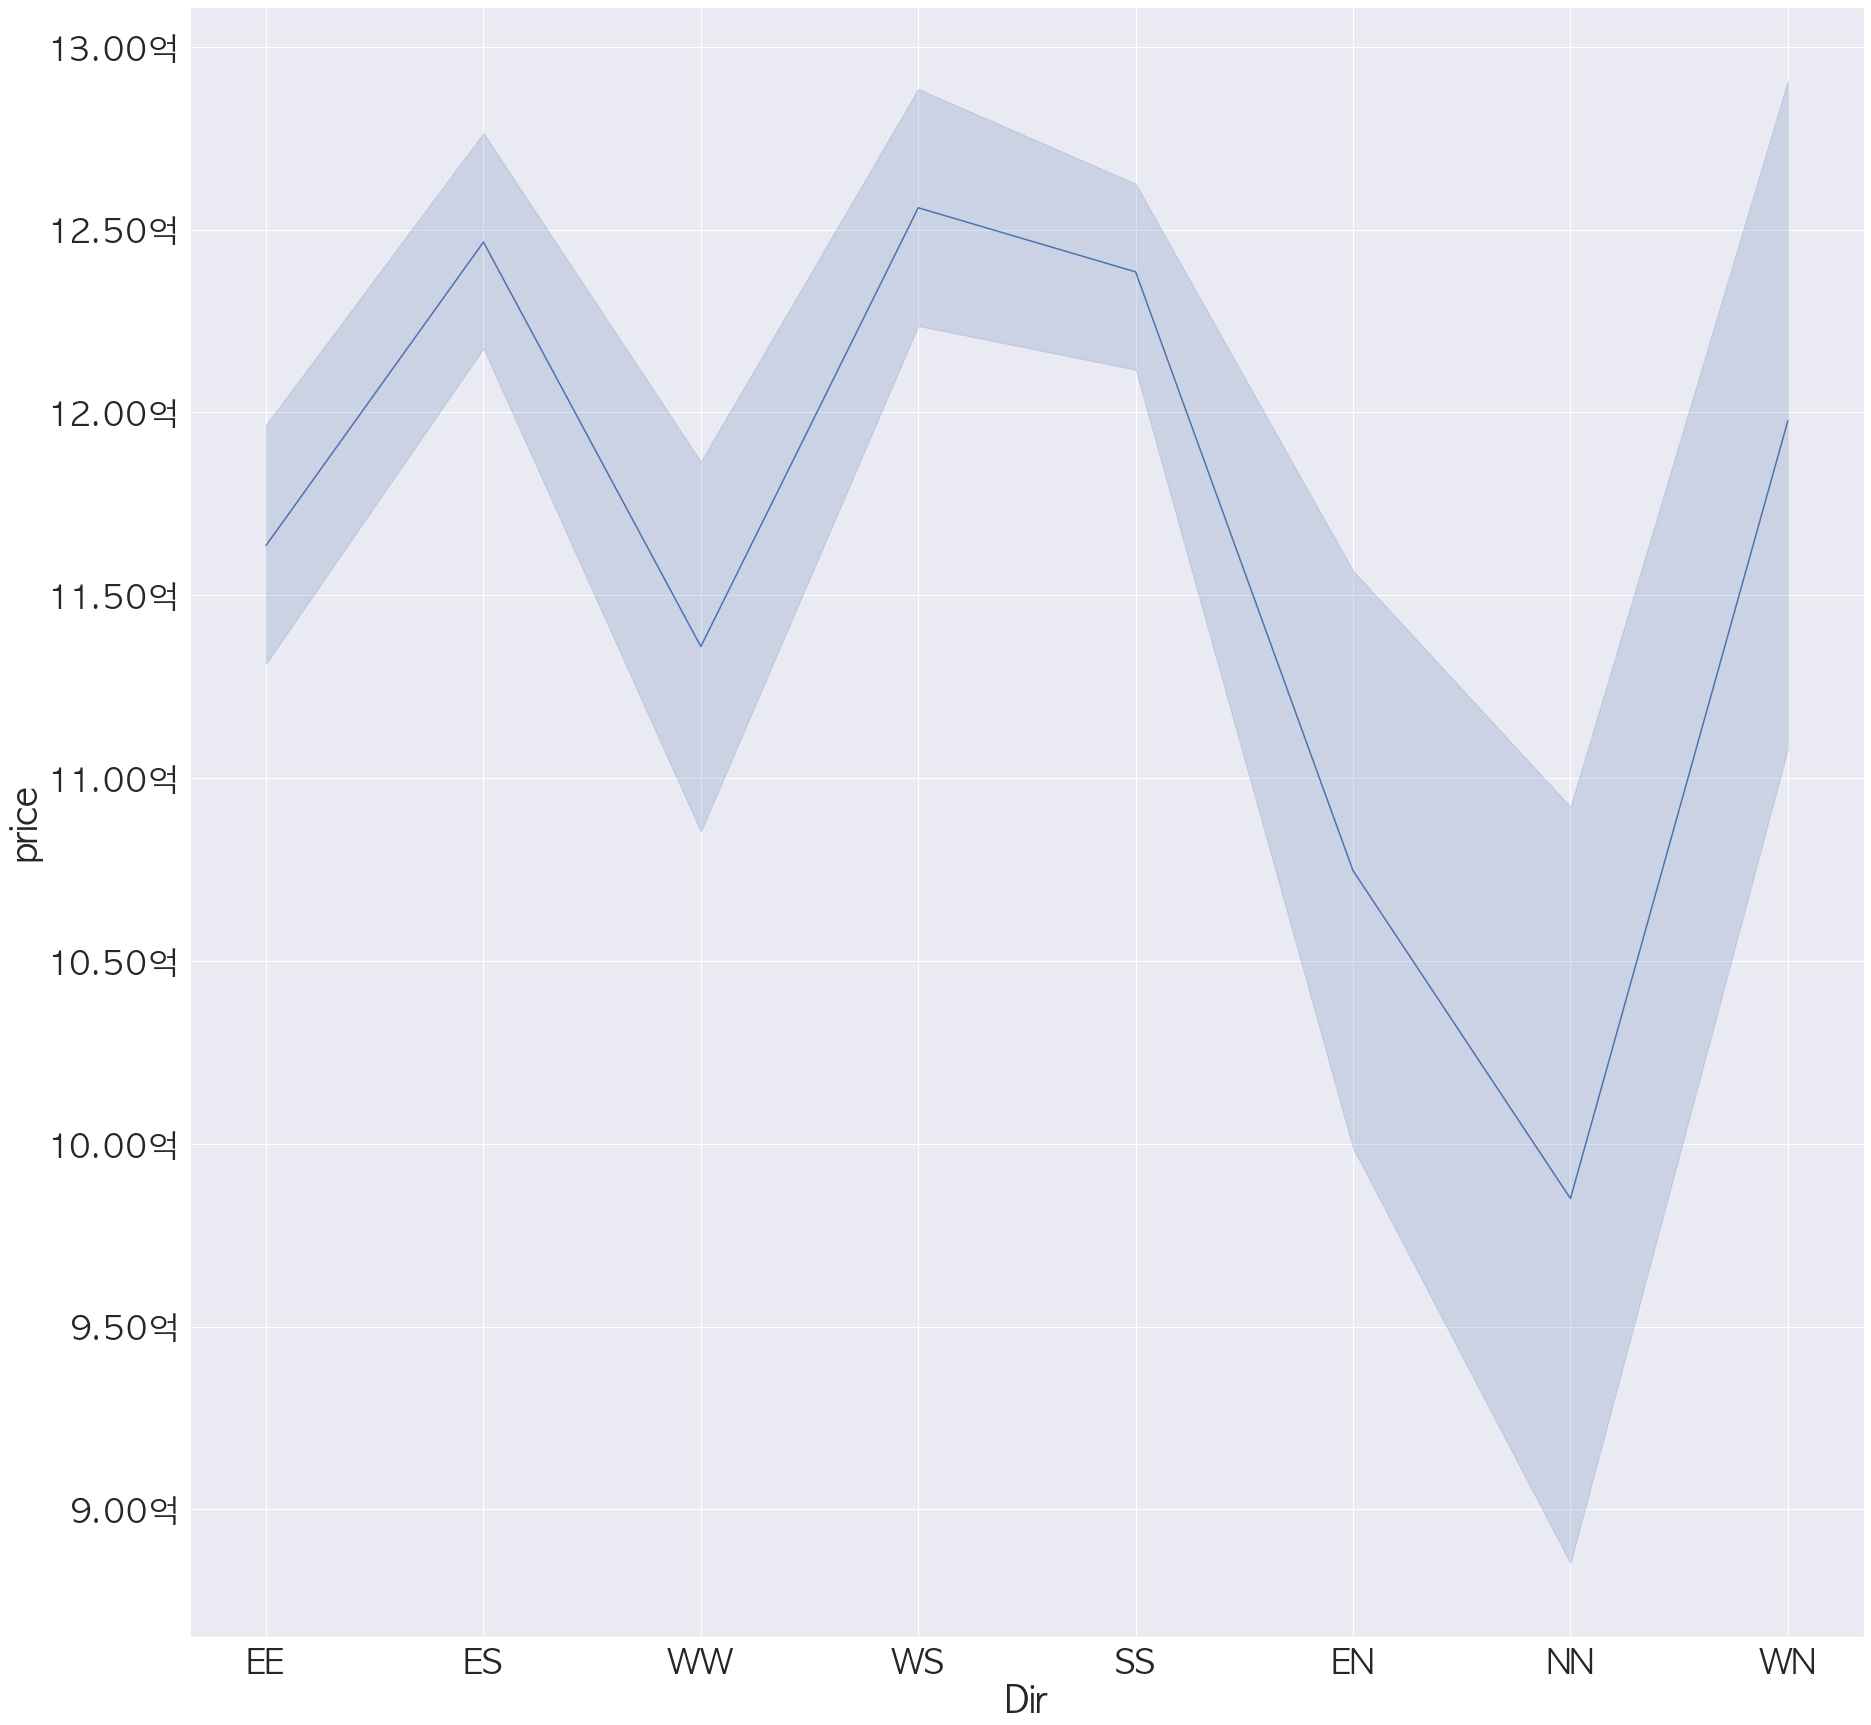

In [123]:
sns.set(font_scale = 3) 
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.lineplot(x='Dir', y = label, data=pre_df)
ylabels = ['{:.2f}'.format(x) + '억' for x in ax.get_yticks() / 10000]
ax.set_yticklabels(ylabels)

## Label Encoding

In [124]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):                                     #It convert the catorigcal and string data into numerical values to 
    encoders = {}
    i = 0
    for c in df.columns:      #interperate easily.
        encoders[i] = None
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
            encoders[i] = lbl
        i += 1
    return df, encoders

label_df = pre_df[label]

feature_df, encoders = labelencoder(pre_df[features].copy())

feature_df.isnull().sum()

Type                  0
Dir                   0
Old                   0
sector                0
divisition            0
representativeArea    0
floorAreaRatio        0
BUS                   0
METRO                 0
INFANT                0
PRESCHOOL             0
HOSPITAL              0
PARKING               0
MART                  0
CONVENIENCE           0
BANK                  0
OFFICE                0
PRI_SCHOOL            0
PUB_SCHOOL            0
dtype: int64

## Training

In [129]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2)

feature_df

,Type,Dir,Old,sector,divisition,representativeArea,floorAreaRatio,BUS,METRO,INFANT,PRESCHOOL,HOSPITAL,PARKING,MART,CONVENIENCE,BANK,OFFICE,PRI_SCHOOL,PUB_SCHOOL
0,0,0,2,0,17,182.0,545.0,False,False,False,False,False,True,False,True,False,False,False,False
1,0,0,1,0,17,110.0,285.0,False,False,False,False,False,False,False,False,False,False,False,False
2,0,0,2,0,17,141.0,299.0,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0,2,0,17,81.0,343.0,False,False,True,False,False,False,False,True,True,False,False,False
4,0,0,2,0,17,35.0,673.0,False,False,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10601,0,4,2,281,23,118.0,837.0,False,False,False,False,False,True,False,True,True,False,False,False
10602,0,4,0,281,23,163.0,696.0,False,False,True,False,False,True,False,True,True,False,False,False
10603,0,1,0,281,23,163.0,696.0,False,False,True,False,False,True,False,True,True,False,False,False
10604,0,3,0,281,23,29.0,799.0,True,False,False,True,False,True,False,True,True,False,False,False


In [137]:
# creating a object
LR_Model = LinearRegression()
LR_Model.fit(x_train, y_train)
pred = LR_Model.predict(x_test)

In [138]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 38235.937629893255
MSE: 2815028611.7728944
RMSE: 53056.84321341493


In [142]:
def encode(value, encoder, delta = 0):
    for i in range(len(value)):
        if i + delta < 0 : continue
        
        if encoder[i + delta] != None:
            value[i] = encoder[i + delta].transform([value[i]])[0]
    return value

In [150]:
value = encode(['APT', 'WS', 'Old', '대치동', '강남구', 103, 237, True, False, True, True, False, True, True, True, True, True, True, True], encoders)

LR_Model.predict([value])

array([82222.11715656])

<AxesSubplot:>

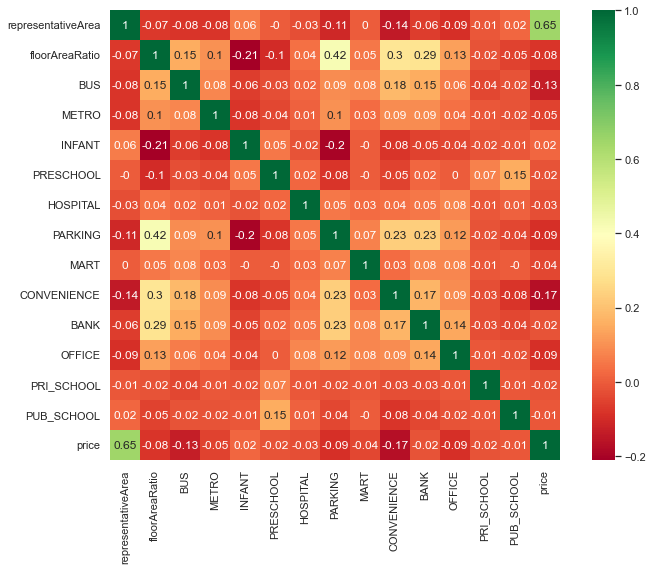

In [125]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(pre_df.corr().round(2), square=True, cmap='RdYlGn', annot=True)

In [165]:
value = encode(['APT', 'WS', 'Old', '대치동', '강남구', 120, 100, False, False, False, False, False, False, False, False, False, False, False, False], encoders)

from sklearn.ensemble import RandomForestRegressor
#트리가 10개일때, 20일때, 30일때, 40일때
for i in (10, 20, 30, 40):
    model = RandomForestRegressor(n_estimators = i, random_state = 15)
    model.fit(x_train, y_train)
    print(model.feature_importances_)
    pred = model.predict(x_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('value ', model.predict([value]))

[0.00000000e+00 3.61851192e-03 3.91415825e-02 7.34176971e-02
 2.59328921e-01 4.81321902e-01 8.60065088e-02 8.50532768e-03
 2.02503839e-03 9.58495683e-03 3.57934877e-03 1.35519590e-04
 5.43982558e-03 3.49845384e-03 1.05793707e-02 8.95015234e-03
 3.72697959e-03 4.08264789e-05 1.09907700e-03]
RMSE: 14775.011451065731
value  [197250.]
[0.00000000e+00 3.55974654e-03 3.85567210e-02 7.59468204e-02
 2.62825243e-01 4.77983959e-01 8.68216259e-02 8.55788017e-03
 2.00241302e-03 8.78744982e-03 3.27441149e-03 2.13537886e-04
 5.93471878e-03 2.92788580e-03 1.00859883e-02 7.96766031e-03
 3.46744455e-03 5.10395837e-05 1.03545390e-03]
RMSE: 14318.065737014133
value  [218375.]
[0.00000000e+00 3.37400044e-03 3.82564168e-02 7.62580511e-02
 2.61651434e-01 4.78767804e-01 8.69347886e-02 9.04929463e-03
 1.95993618e-03 9.41393914e-03 2.86203753e-03 1.82674945e-04
 6.34075416e-03 2.78446366e-03 9.88083320e-03 7.86981075e-03
 3.31494611e-03 4.73268255e-05 1.05148839e-03]
RMSE: 13876.551136530014
value  [220616.666

<class 'numpy.ndarray'>
Feature 0: nan
Feature 1: 5.072793
Feature 2: 107.507514
Feature 3: 20.210599
Feature 4: 32.261124
Feature 5: 6211.569770
Feature 6: 58.291350
Feature 7: 168.280014
Feature 8: 24.459197
Feature 9: 3.504973
Feature 10: 1.146153
Feature 11: 5.944318
Feature 12: 69.751718
Feature 13: 17.102281
Feature 14: 248.071054
Feature 15: 5.575853
Feature 16: 73.077138
Feature 17: 2.838728
Feature 18: 0.025143


/Users/byungjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


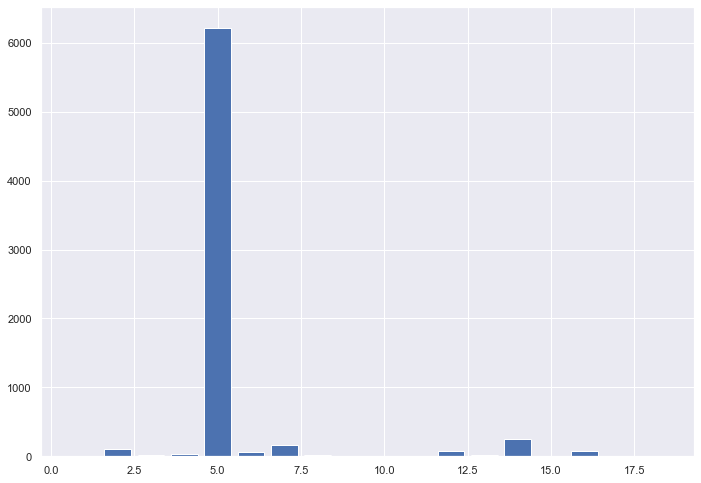